In [4]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
# The dataset of all posts in subreddit meme
path = "/scratch/midway3/yingrong/MEME_data/meme_data/meme_submission.json"
with open(path, "r") as json_file:
    all_submissions =  json.load(json_file)
print(len(all_submissions))

1508474


In [6]:
# The dataset of posts with downloaded images in the subreddit meme
path = "/scratch/midway3/yingrong/MEME_data/meme_data/filtered_submission.json"
with open(path, "r") as json_file:
    submissions_df = json.load(json_file)

In [4]:
# The dataset of all templated memes in the subreddit meme
file = "/home/yingrong/meme_project/time_series/templated_meme2.json"
with open(file, "r") as json_file:
    data_templated = json.load(json_file)

In [11]:
import pandas as pd
file_path = "/scratch/midway3/yingrong/MEME_data/meme_data/meme_table.csv"
with open(file_path, "r") as f:
    popularity_df = pd.read_csv(f)
popularity_df.head()

,meme_id,cluster,created_utc,title,selftext,author,num_comments,score,extracted_text,comments_text,created_date
0,cawlo8,cluster_4,1.562651e+09,"I have an MIDI keyboard, just no plug for it ):",NaN,YTMusicXD,0,3,When you want to easily make midi; limited pow...,NaN,2019-07-09
1,d72m1n,cluster_4,1.569021e+09,R.I.P,NaN,masnargom,0,95,When Imina room full of antivax children and f...,NaN,2019-09-20
2,bo6k2s,cluster_4,1.557769e+09,It's like a life hack,NaN,emanuelegay,2,4,Connect one Power Bank to another one Unlimite...,This is just plug in a power strip to itself\n...,2019-05-13
3,cr40bc,cluster_4,1.565948e+09,I Finally Have Unlimited Power,NaN,Zaxoosh,0,64,When you finally get enough karma to post on r...,NaN,2019-08-16
4,apoel0,cluster_4,1.549939e+09,Crrevt,NaN,memeboiiii7059,0,7,whwn yoy make a meme wirh one hand Unlimited p...,NaN,2019-02-12


In [12]:
top = popularity_df["cluster"].value_counts()
top.head(15)

cluster_175      2184
Acluster_290     1231
cluster_81       1191
cluster_694      1106
cluster_200      1000
cluster_833       984
cluster_5         933
cluster_34        898
cluster_318       898
cluster_609       894
cluster_14449     893
Acluster_252      880
cluster_1341      783
cluster_31        722
cluster_8016      722
Name: cluster, dtype: int64

In [7]:
%%time
# Assuming you have all_paths and new_dic already defined
all_lst = []

for submission in all_submissions:
    new_lst = []
    new_lst.append(submission["id"])
    new_lst.append(submission["created_utc"])
    all_lst.append(new_lst)

# Create the DataFrame
columns = ["meme_id", "created_utc"]
all_posts_df = pd.DataFrame(all_lst, columns=columns)

# Display the first few rows of the DataFrame
print(all_posts_df.head())

  meme_id created_utc
0   7iigp  1228890135
1   7iy9c  1229043928
2   7jm0g  1229357497
3   7thcb  1233273380
4   8xg6c  1246491988
CPU times: user 1.52 s, sys: 201 ms, total: 1.72 s
Wall time: 1.77 s


In [8]:
%%time
# Here it created a dataframe for the trend of filtered submissions. We didn't test this one below, 
# but it might be useful for the future analysis.
all_lst = []

for k, v in submissions_df.items():
    new_lst = []
    new_lst.append(k)
    new_lst.append(v["created_utc"])
    all_lst.append(new_lst)

# Create the DataFrame
columns = ["meme_id", "created_utc"]
filtered_posts_df = pd.DataFrame(all_lst, columns=columns)

# Display the first few rows of the DataFrame
print(filtered_posts_df.head())

  meme_id created_utc
0  cb7h3n  1562709147
1  2ghiry  1410808612
2  bxiusl  1559839153
3  cawlo8  1562650591
4  cdec7b  1563175174
CPU times: user 9.42 s, sys: 348 ms, total: 9.77 s
Wall time: 9.89 s


In [9]:
# Step 1: Calculate total number of posts for the whole dataset
all_posts_df['created_date'] = pd.to_datetime(all_posts_df['created_utc'], unit="s")
all_posts_df.set_index('created_date', inplace=True)

total_weekly_posts = all_posts_df.resample('W').size()
total_monthly_posts = all_posts_df.resample('M').size()

/scratch/local/jobs/26483905/ipykernel_1705954/1129067726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")


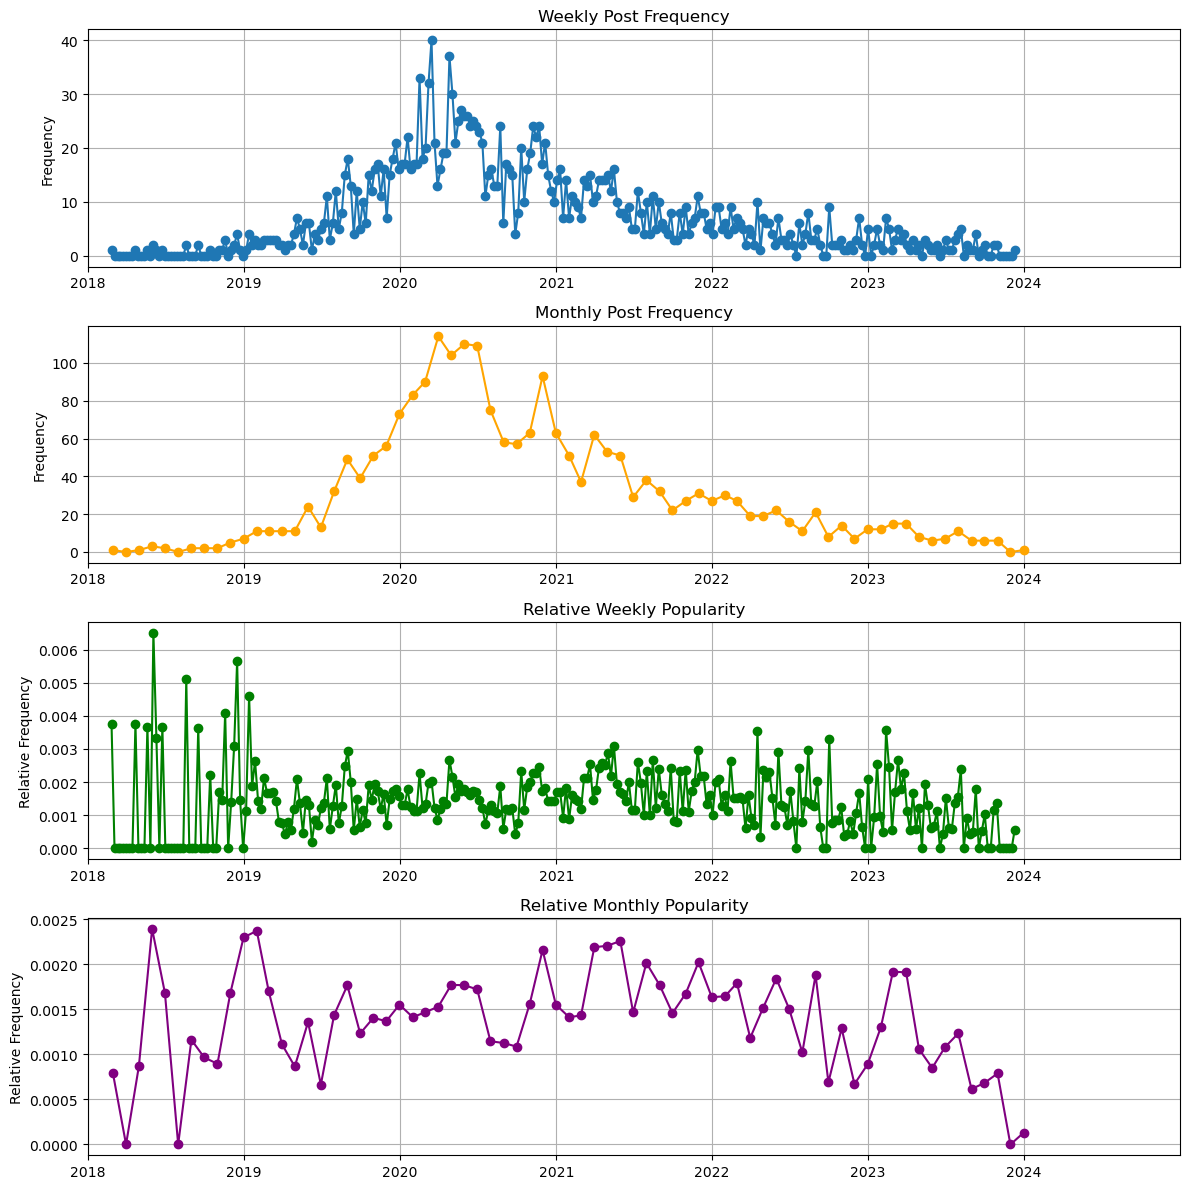

In [14]:
# cluster_175
cluster_df = popularity_df[popularity_df["cluster"] == "cluster_175"]
cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
weekly_frequency = cluster_df.resample('W').size()
monthly_frequency = cluster_df.resample('M').size()

# Step 2: Relative Popularity for the cluster
cluster_weekly_relative = weekly_frequency / total_weekly_posts.reindex(weekly_frequency.index)
cluster_monthly_relative = monthly_frequency / total_monthly_posts.reindex(monthly_frequency.index)

# Step 3: Plot trends
plt.figure(figsize=(12, 12))  # Increase figure height to accommodate 3 subplots
x_min = datetime(2018, 1, 1)
x_max = datetime(2024, 12, 31)

# Weekly trend
plt.subplot(4, 1, 1)
plt.plot(weekly_frequency.index, weekly_frequency, marker='o')
plt.title("Weekly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Monthly trend
plt.subplot(4, 1, 2)
plt.plot(monthly_frequency.index, monthly_frequency, marker='o', color='orange')
plt.title("Monthly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Relative popularity
plt.subplot(4, 1, 3)
plt.plot(cluster_weekly_relative.index, cluster_weekly_relative, marker='o', color='green')
plt.title("Relative Weekly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(cluster_monthly_relative.index, cluster_monthly_relative, marker='o', color='purple')
plt.title("Relative Monthly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/scratch/local/jobs/26483905/ipykernel_1705954/1631218888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")


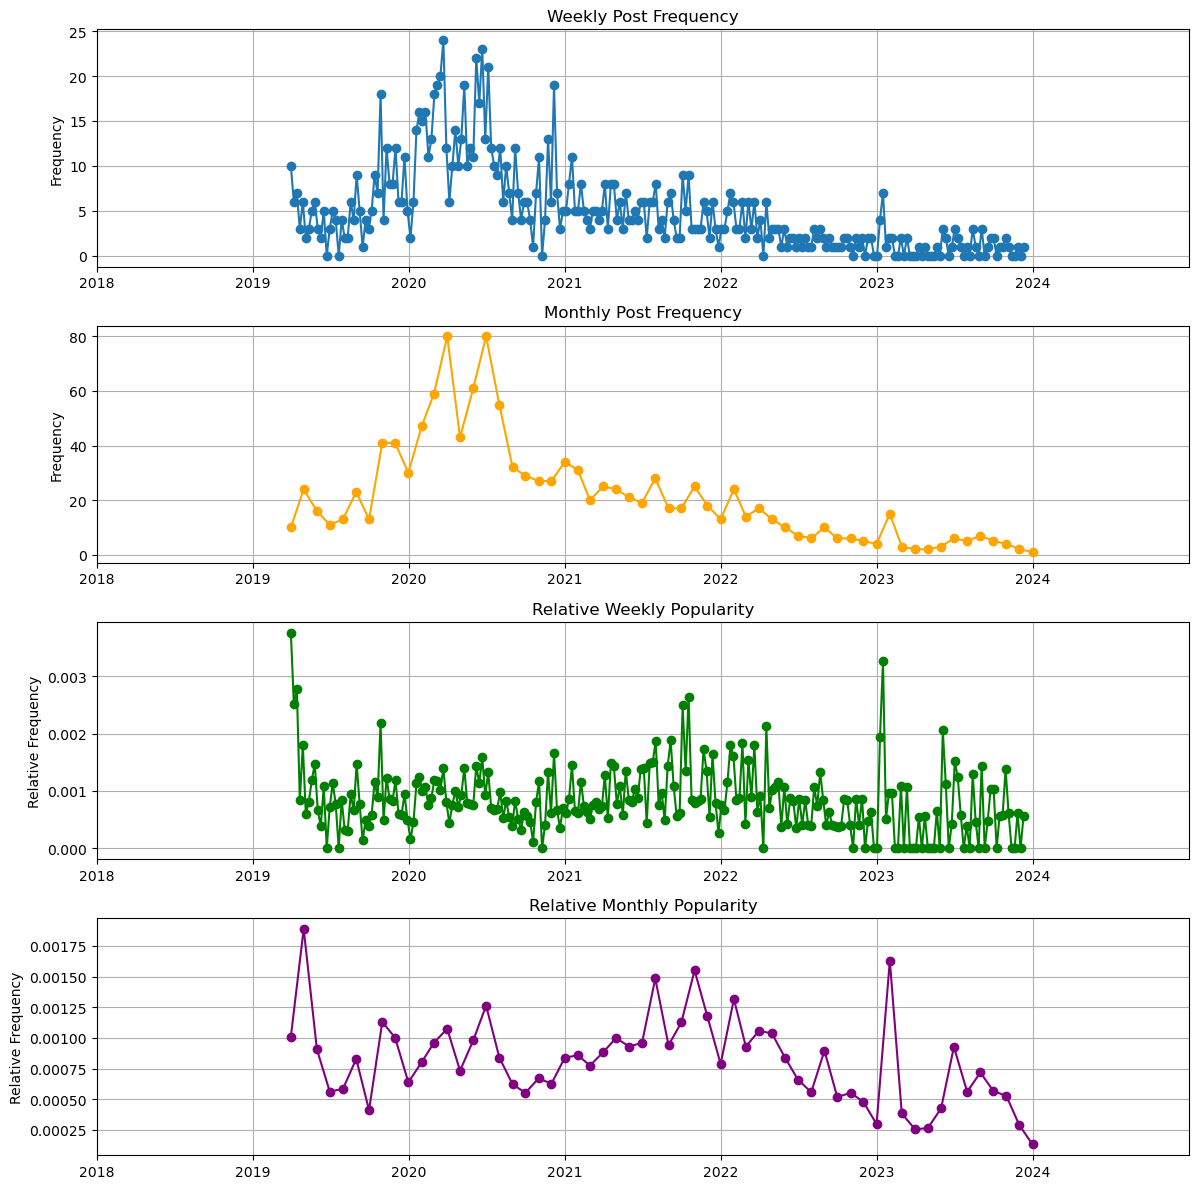

In [15]:
# Acluster_290
cluster_df = popularity_df[popularity_df["cluster"] == "Acluster_290"]
cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
weekly_frequency = cluster_df.resample('W').size()
monthly_frequency = cluster_df.resample('M').size()

# Step 2: Relative Popularity for the cluster
cluster_weekly_relative = weekly_frequency / total_weekly_posts.reindex(weekly_frequency.index)
cluster_monthly_relative = monthly_frequency / total_monthly_posts.reindex(monthly_frequency.index)

# Step 3: Plot trends
plt.figure(figsize=(12, 12))  # Increase figure height to accommodate 3 subplots
x_min = datetime(2018, 1, 1)
x_max = datetime(2024, 12, 31)

# Weekly trend
plt.subplot(4, 1, 1)
plt.plot(weekly_frequency.index, weekly_frequency, marker='o')
plt.title("Weekly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Monthly trend
plt.subplot(4, 1, 2)
plt.plot(monthly_frequency.index, monthly_frequency, marker='o', color='orange')
plt.title("Monthly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Relative popularity
plt.subplot(4, 1, 3)
plt.plot(cluster_weekly_relative.index, cluster_weekly_relative, marker='o', color='green')
plt.title("Relative Weekly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(cluster_monthly_relative.index, cluster_monthly_relative, marker='o', color='purple')
plt.title("Relative Monthly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/scratch/local/jobs/26483905/ipykernel_1705954/2925979442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")


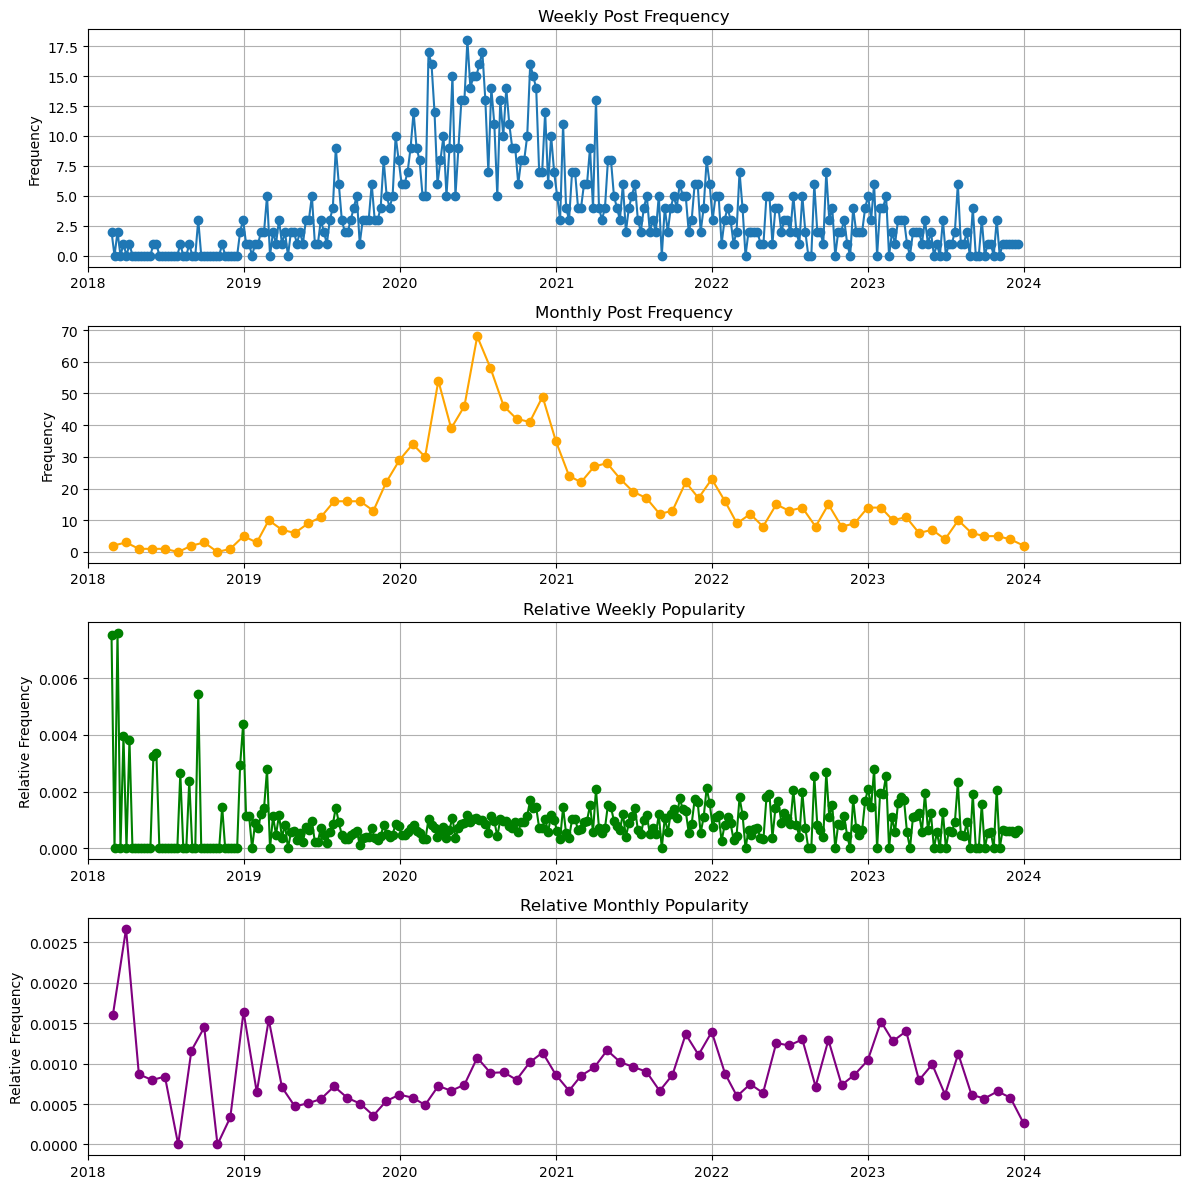

In [16]:
# cluster_81
cluster_df = popularity_df[popularity_df["cluster"] == "cluster_81"]
cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
weekly_frequency = cluster_df.resample('W').size()
monthly_frequency = cluster_df.resample('M').size()

# Step 2: Relative Popularity for the cluster
cluster_weekly_relative = weekly_frequency / total_weekly_posts.reindex(weekly_frequency.index)
cluster_monthly_relative = monthly_frequency / total_monthly_posts.reindex(monthly_frequency.index)

# Step 3: Plot trends
plt.figure(figsize=(12, 12))  # Increase figure height to accommodate 3 subplots
x_min = datetime(2018, 1, 1)
x_max = datetime(2024, 12, 31)

# Weekly trend
plt.subplot(4, 1, 1)
plt.plot(weekly_frequency.index, weekly_frequency, marker='o')
plt.title("Weekly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Monthly trend
plt.subplot(4, 1, 2)
plt.plot(monthly_frequency.index, monthly_frequency, marker='o', color='orange')
plt.title("Monthly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Relative popularity
plt.subplot(4, 1, 3)
plt.plot(cluster_weekly_relative.index, cluster_weekly_relative, marker='o', color='green')
plt.title("Relative Weekly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(cluster_monthly_relative.index, cluster_monthly_relative, marker='o', color='purple')
plt.title("Relative Monthly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/scratch/local/jobs/26483905/ipykernel_1705954/1375589589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")


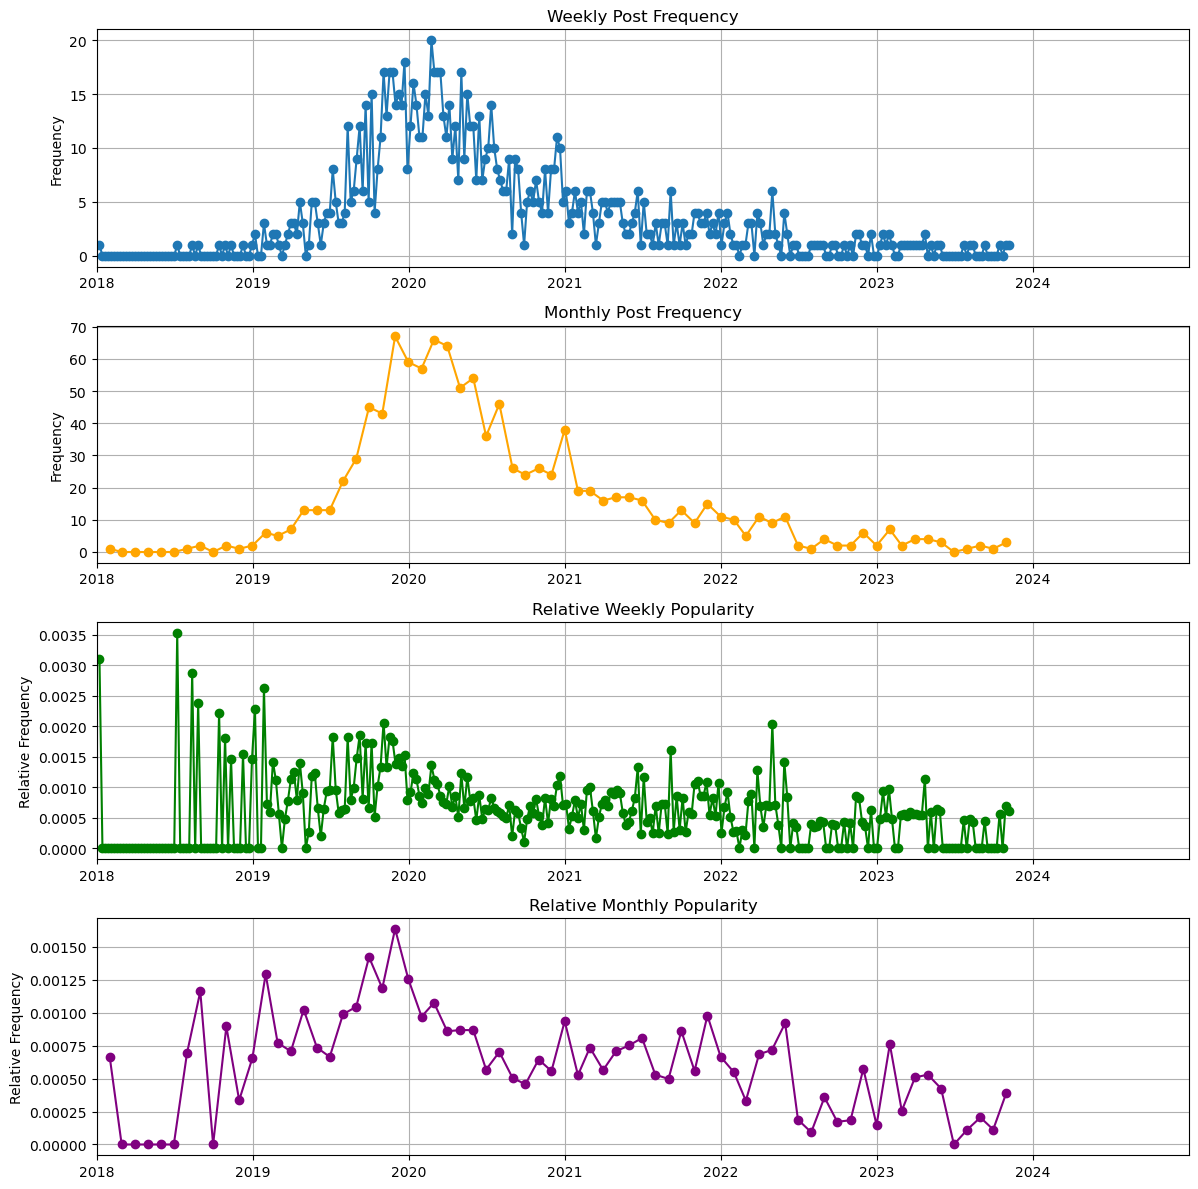

In [17]:
# cluster_694
cluster_df = popularity_df[popularity_df["cluster"] == "cluster_694"]
cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
weekly_frequency = cluster_df.resample('W').size()
monthly_frequency = cluster_df.resample('M').size()

# Step 2: Relative Popularity for the cluster
cluster_weekly_relative = weekly_frequency / total_weekly_posts.reindex(weekly_frequency.index)
cluster_monthly_relative = monthly_frequency / total_monthly_posts.reindex(monthly_frequency.index)

# Step 3: Plot trends
plt.figure(figsize=(12, 12))  # Increase figure height to accommodate 3 subplots
x_min = datetime(2018, 1, 1)
x_max = datetime(2024, 12, 31)

# Weekly trend
plt.subplot(4, 1, 1)
plt.plot(weekly_frequency.index, weekly_frequency, marker='o')
plt.title("Weekly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Monthly trend
plt.subplot(4, 1, 2)
plt.plot(monthly_frequency.index, monthly_frequency, marker='o', color='orange')
plt.title("Monthly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Relative popularity
plt.subplot(4, 1, 3)
plt.plot(cluster_weekly_relative.index, cluster_weekly_relative, marker='o', color='green')
plt.title("Relative Weekly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(cluster_monthly_relative.index, cluster_monthly_relative, marker='o', color='purple')
plt.title("Relative Monthly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/scratch/local/jobs/26483905/ipykernel_1705954/834674655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")


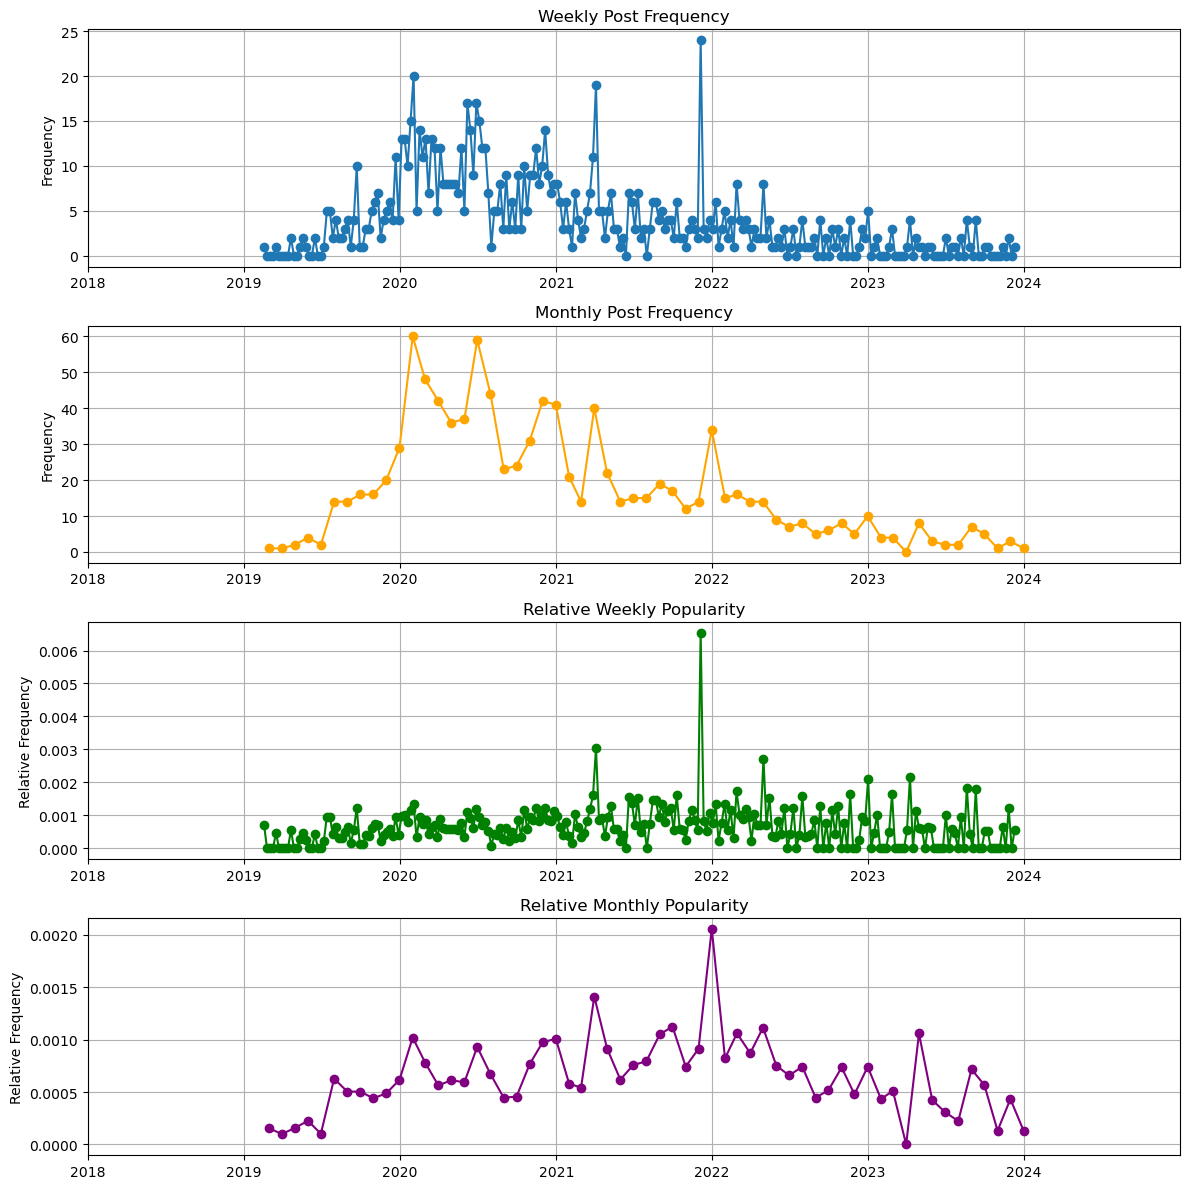

In [18]:
# cluster_200
cluster_df = popularity_df[popularity_df["cluster"] == "cluster_200"]
cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
weekly_frequency = cluster_df.resample('W').size()
monthly_frequency = cluster_df.resample('M').size()

# Step 2: Relative Popularity for the cluster
cluster_weekly_relative = weekly_frequency / total_weekly_posts.reindex(weekly_frequency.index)
cluster_monthly_relative = monthly_frequency / total_monthly_posts.reindex(monthly_frequency.index)

# Step 3: Plot trends
plt.figure(figsize=(12, 12))  # Increase figure height to accommodate 3 subplots
x_min = datetime(2018, 1, 1)
x_max = datetime(2024, 12, 31)

# Weekly trend
plt.subplot(4, 1, 1)
plt.plot(weekly_frequency.index, weekly_frequency, marker='o')
plt.title("Weekly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Monthly trend
plt.subplot(4, 1, 2)
plt.plot(monthly_frequency.index, monthly_frequency, marker='o', color='orange')
plt.title("Monthly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Relative popularity
plt.subplot(4, 1, 3)
plt.plot(cluster_weekly_relative.index, cluster_weekly_relative, marker='o', color='green')
plt.title("Relative Weekly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(cluster_monthly_relative.index, cluster_monthly_relative, marker='o', color='purple')
plt.title("Relative Monthly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/scratch/local/jobs/26483905/ipykernel_1705954/3460970072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")


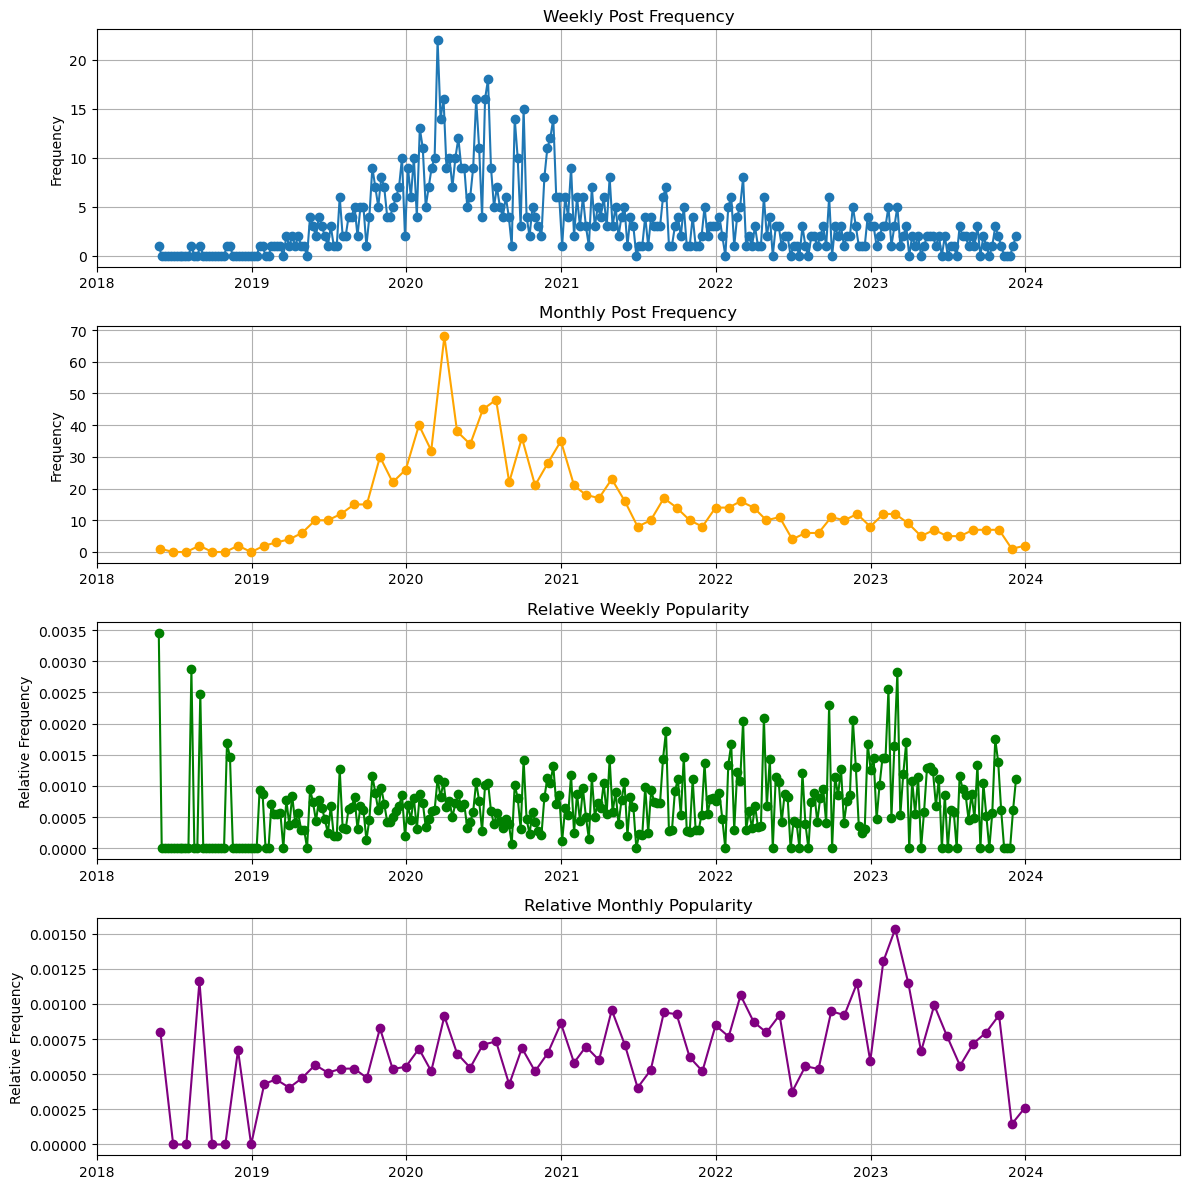

In [19]:
# cluster_833
cluster_df = popularity_df[popularity_df["cluster"] == "cluster_833"]
cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
weekly_frequency = cluster_df.resample('W').size()
monthly_frequency = cluster_df.resample('M').size()

# Step 2: Relative Popularity for the cluster
cluster_weekly_relative = weekly_frequency / total_weekly_posts.reindex(weekly_frequency.index)
cluster_monthly_relative = monthly_frequency / total_monthly_posts.reindex(monthly_frequency.index)

# Step 3: Plot trends
plt.figure(figsize=(12, 12))  # Increase figure height to accommodate 3 subplots
x_min = datetime(2018, 1, 1)
x_max = datetime(2024, 12, 31)

# Weekly trend
plt.subplot(4, 1, 1)
plt.plot(weekly_frequency.index, weekly_frequency, marker='o')
plt.title("Weekly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Monthly trend
plt.subplot(4, 1, 2)
plt.plot(monthly_frequency.index, monthly_frequency, marker='o', color='orange')
plt.title("Monthly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Relative popularity
plt.subplot(4, 1, 3)
plt.plot(cluster_weekly_relative.index, cluster_weekly_relative, marker='o', color='green')
plt.title("Relative Weekly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(cluster_monthly_relative.index, cluster_monthly_relative, marker='o', color='purple')
plt.title("Relative Monthly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/scratch/local/jobs/26483905/ipykernel_1705954/1598584827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")


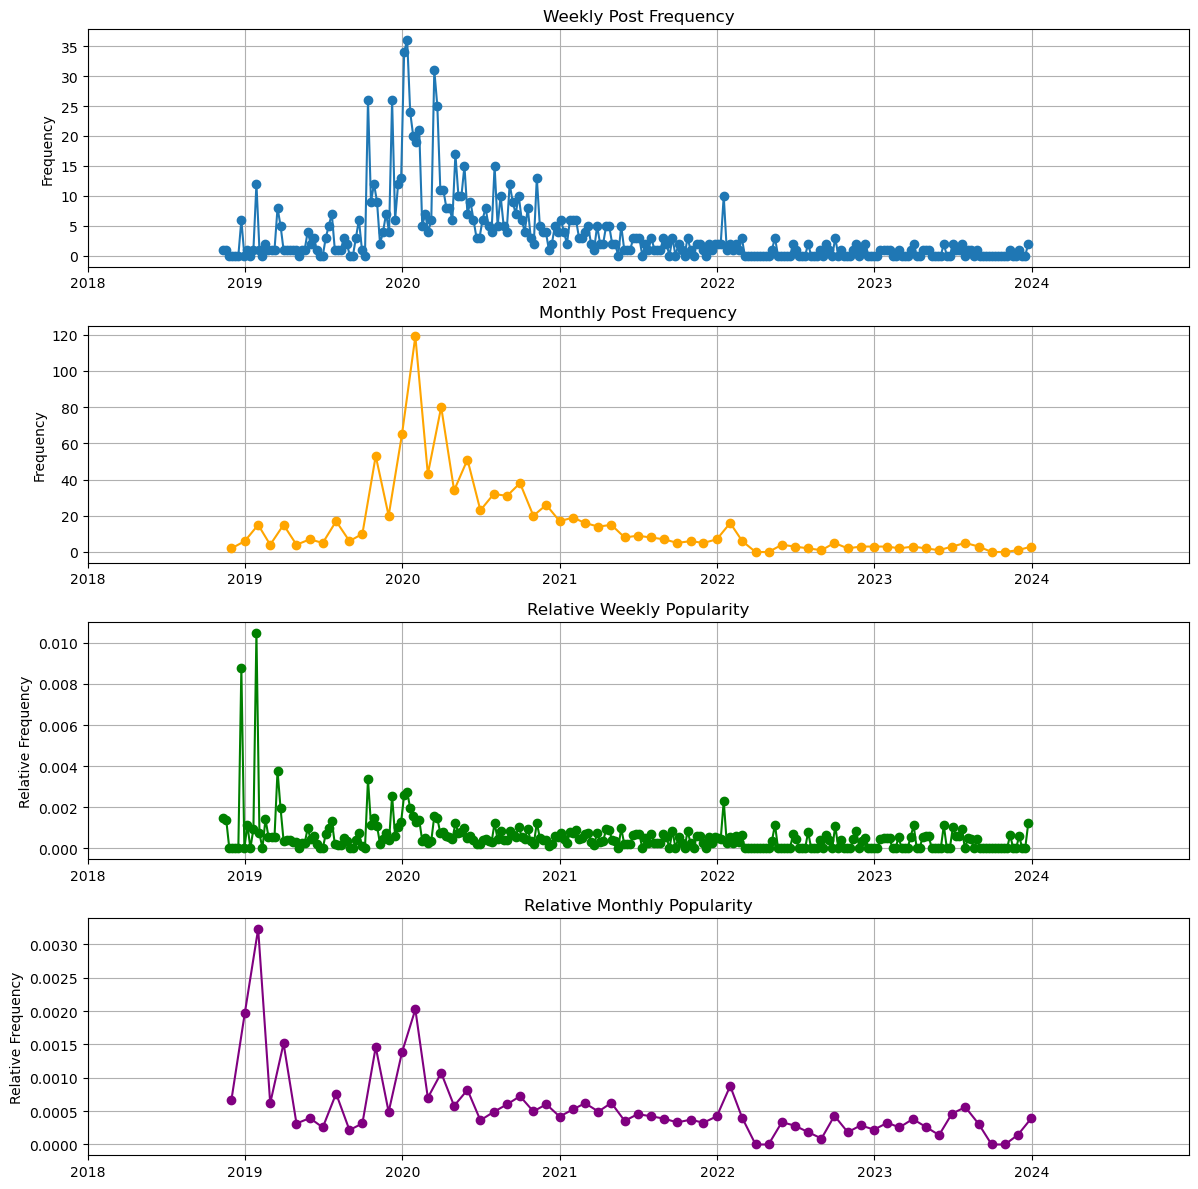

In [20]:
# cluster_5
cluster_df = popularity_df[popularity_df["cluster"] == "cluster_5"]
cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
weekly_frequency = cluster_df.resample('W').size()
monthly_frequency = cluster_df.resample('M').size()

# Step 2: Relative Popularity for the cluster
cluster_weekly_relative = weekly_frequency / total_weekly_posts.reindex(weekly_frequency.index)
cluster_monthly_relative = monthly_frequency / total_monthly_posts.reindex(monthly_frequency.index)

# Step 3: Plot trends
plt.figure(figsize=(12, 12))  # Increase figure height to accommodate 3 subplots
x_min = datetime(2018, 1, 1)
x_max = datetime(2024, 12, 31)

# Weekly trend
plt.subplot(4, 1, 1)
plt.plot(weekly_frequency.index, weekly_frequency, marker='o')
plt.title("Weekly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Monthly trend
plt.subplot(4, 1, 2)
plt.plot(monthly_frequency.index, monthly_frequency, marker='o', color='orange')
plt.title("Monthly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Relative popularity
plt.subplot(4, 1, 3)
plt.plot(cluster_weekly_relative.index, cluster_weekly_relative, marker='o', color='green')
plt.title("Relative Weekly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(cluster_monthly_relative.index, cluster_monthly_relative, marker='o', color='purple')
plt.title("Relative Monthly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/scratch/local/jobs/26483905/ipykernel_1705954/1391246649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")


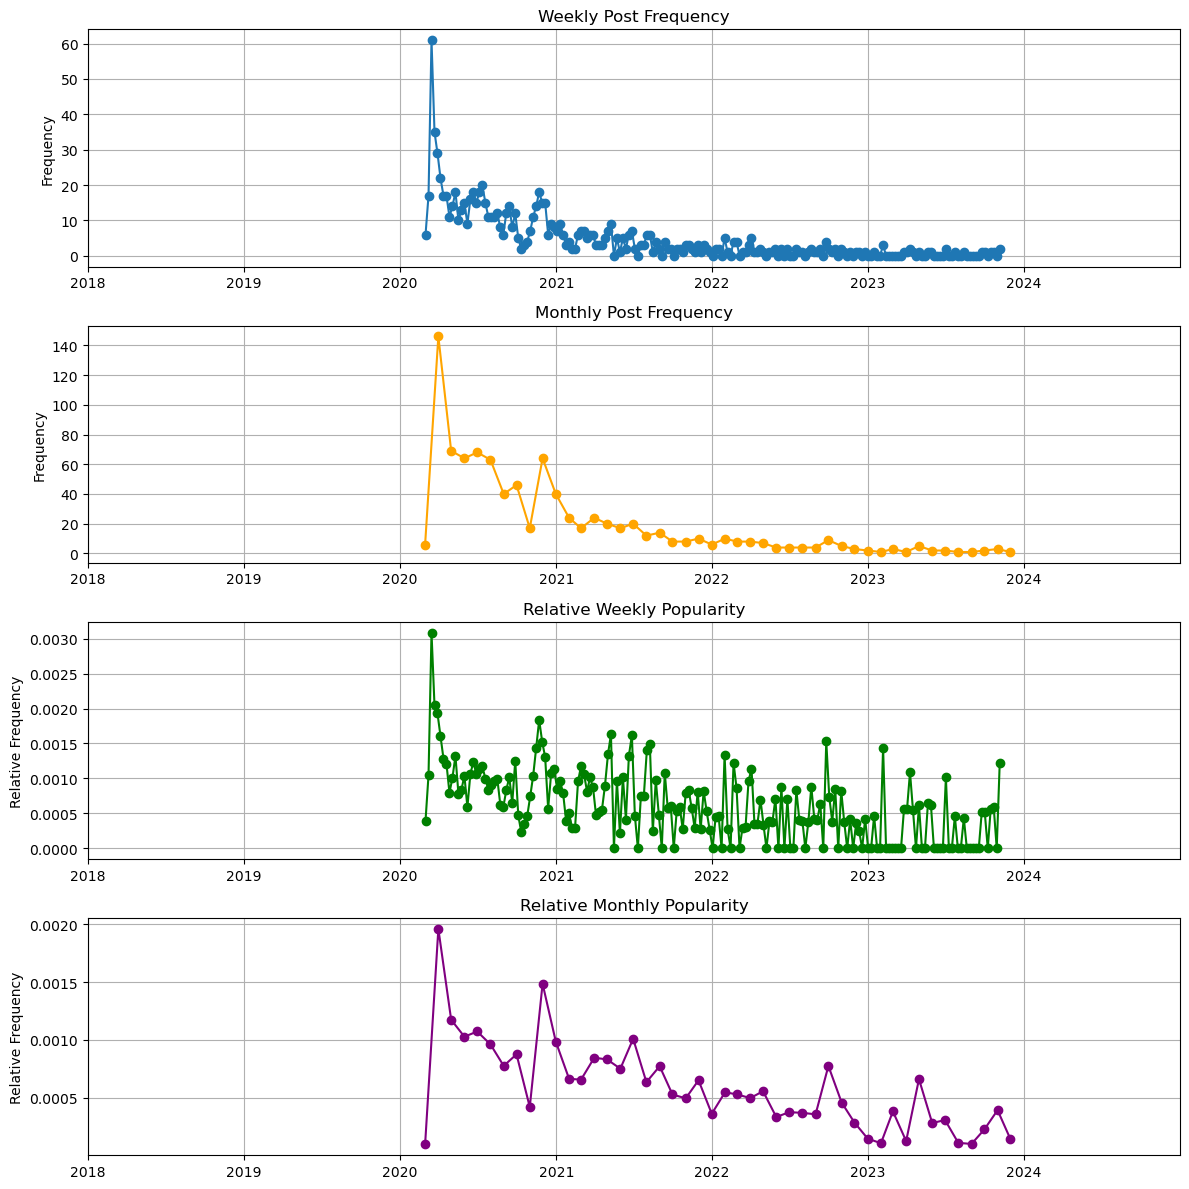

In [21]:
# cluster_14449
cluster_df = popularity_df[popularity_df["cluster"] == "cluster_14449"]
cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
weekly_frequency = cluster_df.resample('W').size()
monthly_frequency = cluster_df.resample('M').size()

# Step 2: Relative Popularity for the cluster
cluster_weekly_relative = weekly_frequency / total_weekly_posts.reindex(weekly_frequency.index)
cluster_monthly_relative = monthly_frequency / total_monthly_posts.reindex(monthly_frequency.index)

# Step 3: Plot trends
plt.figure(figsize=(12, 12))  # Increase figure height to accommodate 3 subplots
x_min = datetime(2018, 1, 1)
x_max = datetime(2024, 12, 31)

# Weekly trend
plt.subplot(4, 1, 1)
plt.plot(weekly_frequency.index, weekly_frequency, marker='o')
plt.title("Weekly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Monthly trend
plt.subplot(4, 1, 2)
plt.plot(monthly_frequency.index, monthly_frequency, marker='o', color='orange')
plt.title("Monthly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Relative popularity
plt.subplot(4, 1, 3)
plt.plot(cluster_weekly_relative.index, cluster_weekly_relative, marker='o', color='green')
plt.title("Relative Weekly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(cluster_monthly_relative.index, cluster_monthly_relative, marker='o', color='purple')
plt.title("Relative Monthly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/scratch/local/jobs/26483905/ipykernel_1705954/3597291944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")


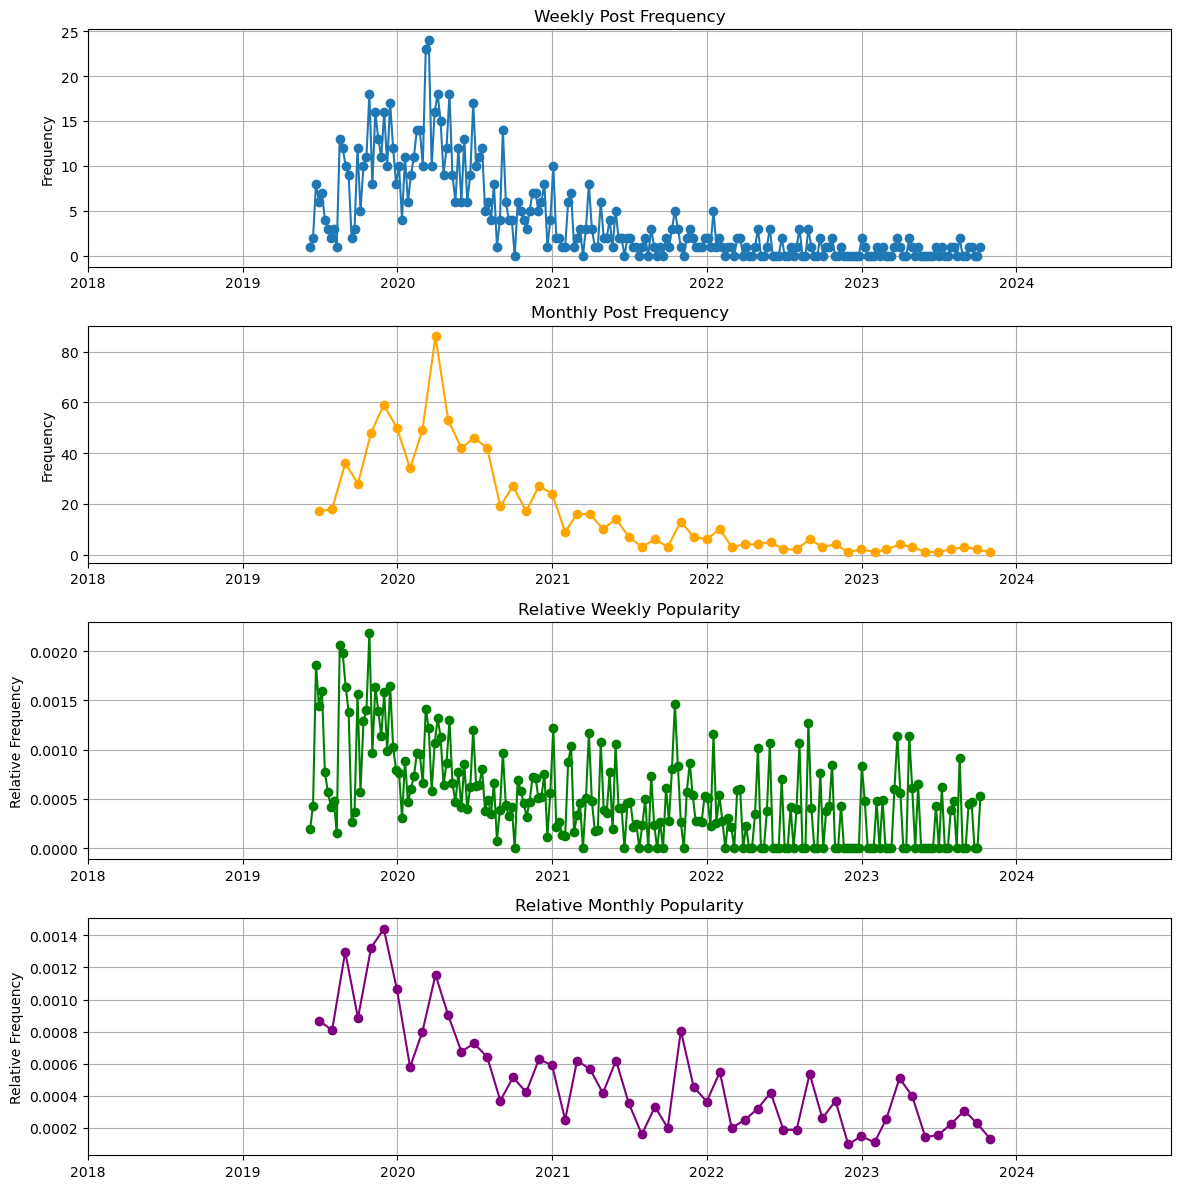

In [22]:
# cluster_318
cluster_df = popularity_df[popularity_df["cluster"] == "cluster_318"]
cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
weekly_frequency = cluster_df.resample('W').size()
monthly_frequency = cluster_df.resample('M').size()

# Step 2: Relative Popularity for the cluster
cluster_weekly_relative = weekly_frequency / total_weekly_posts.reindex(weekly_frequency.index)
cluster_monthly_relative = monthly_frequency / total_monthly_posts.reindex(monthly_frequency.index)

# Step 3: Plot trends
plt.figure(figsize=(12, 12))  # Increase figure height to accommodate 3 subplots
x_min = datetime(2018, 1, 1)
x_max = datetime(2024, 12, 31)

# Weekly trend
plt.subplot(4, 1, 1)
plt.plot(weekly_frequency.index, weekly_frequency, marker='o')
plt.title("Weekly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Monthly trend
plt.subplot(4, 1, 2)
plt.plot(monthly_frequency.index, monthly_frequency, marker='o', color='orange')
plt.title("Monthly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Relative popularity
plt.subplot(4, 1, 3)
plt.plot(cluster_weekly_relative.index, cluster_weekly_relative, marker='o', color='green')
plt.title("Relative Weekly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(cluster_monthly_relative.index, cluster_monthly_relative, marker='o', color='purple')
plt.title("Relative Monthly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/scratch/local/jobs/26483905/ipykernel_1705954/599159807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")


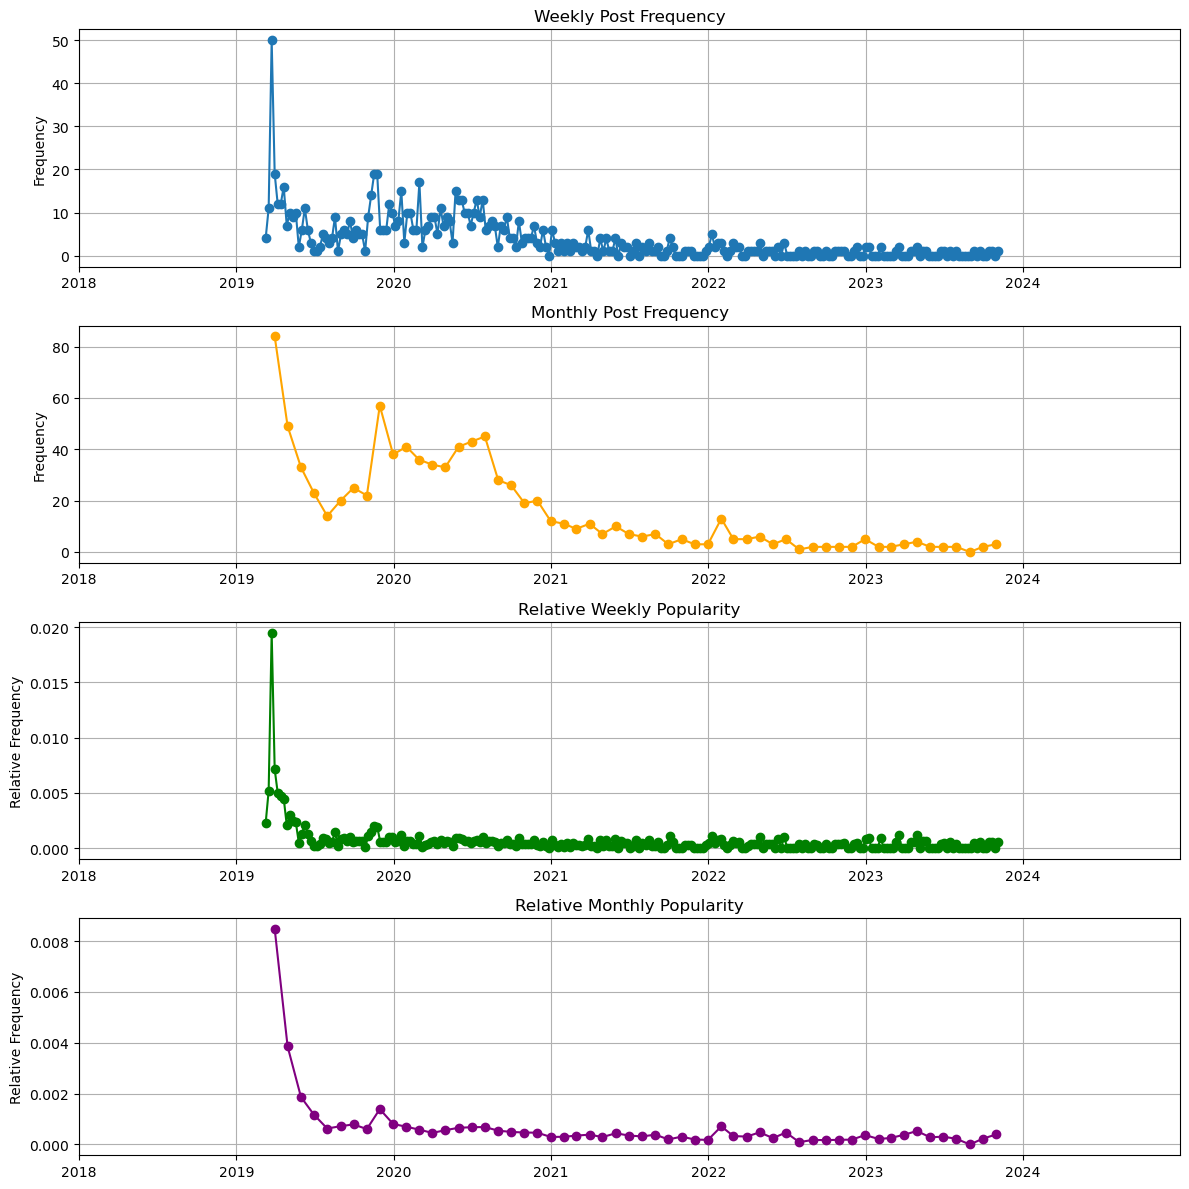

In [23]:
# cluster_34
cluster_df = popularity_df[popularity_df["cluster"] == "cluster_34"]
cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
weekly_frequency = cluster_df.resample('W').size()
monthly_frequency = cluster_df.resample('M').size()

# Step 2: Relative Popularity for the cluster
cluster_weekly_relative = weekly_frequency / total_weekly_posts.reindex(weekly_frequency.index)
cluster_monthly_relative = monthly_frequency / total_monthly_posts.reindex(monthly_frequency.index)

# Step 3: Plot trends
plt.figure(figsize=(12, 12))  # Increase figure height to accommodate 3 subplots
x_min = datetime(2018, 1, 1)
x_max = datetime(2024, 12, 31)

# Weekly trend
plt.subplot(4, 1, 1)
plt.plot(weekly_frequency.index, weekly_frequency, marker='o')
plt.title("Weekly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Monthly trend
plt.subplot(4, 1, 2)
plt.plot(monthly_frequency.index, monthly_frequency, marker='o', color='orange')
plt.title("Monthly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Relative popularity
plt.subplot(4, 1, 3)
plt.plot(cluster_weekly_relative.index, cluster_weekly_relative, marker='o', color='green')
plt.title("Relative Weekly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(cluster_monthly_relative.index, cluster_monthly_relative, marker='o', color='purple')
plt.title("Relative Monthly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/scratch/local/jobs/26483905/ipykernel_1705954/4089315928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")


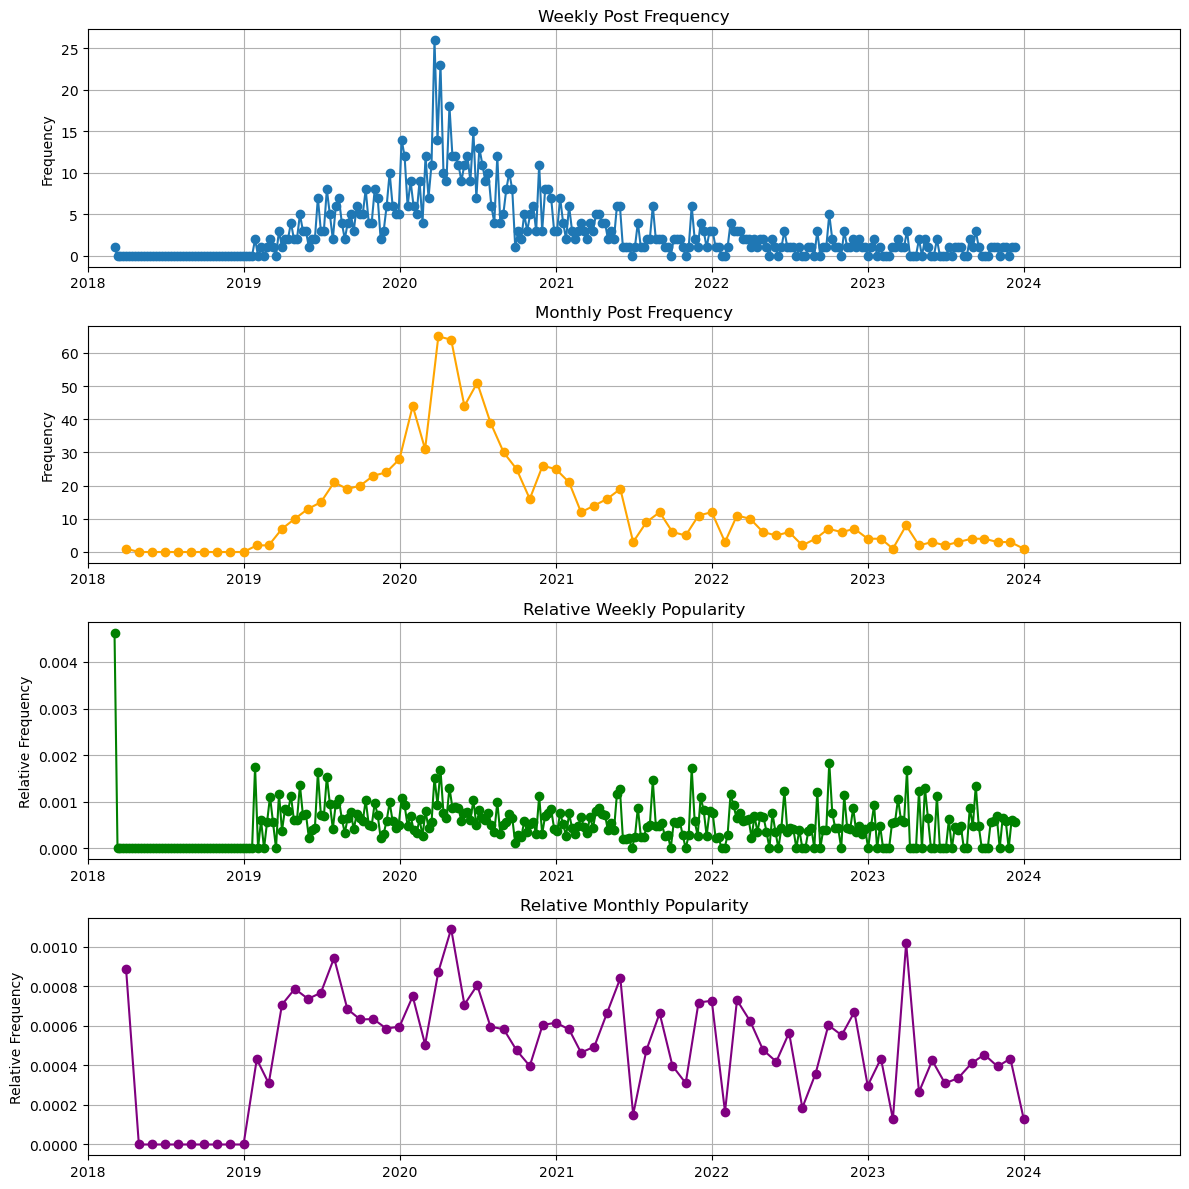

In [24]:
# cluster_609
cluster_df = popularity_df[popularity_df["cluster"] == "cluster_609"]
cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
weekly_frequency = cluster_df.resample('W').size()
monthly_frequency = cluster_df.resample('M').size()

# Step 2: Relative Popularity for the cluster
cluster_weekly_relative = weekly_frequency / total_weekly_posts.reindex(weekly_frequency.index)
cluster_monthly_relative = monthly_frequency / total_monthly_posts.reindex(monthly_frequency.index)

# Step 3: Plot trends
plt.figure(figsize=(12, 12))  # Increase figure height to accommodate 3 subplots
x_min = datetime(2018, 1, 1)
x_max = datetime(2024, 12, 31)

# Weekly trend
plt.subplot(4, 1, 1)
plt.plot(weekly_frequency.index, weekly_frequency, marker='o')
plt.title("Weekly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Monthly trend
plt.subplot(4, 1, 2)
plt.plot(monthly_frequency.index, monthly_frequency, marker='o', color='orange')
plt.title("Monthly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Relative popularity
plt.subplot(4, 1, 3)
plt.plot(cluster_weekly_relative.index, cluster_weekly_relative, marker='o', color='green')
plt.title("Relative Weekly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(cluster_monthly_relative.index, cluster_monthly_relative, marker='o', color='purple')
plt.title("Relative Monthly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/scratch/local/jobs/26483905/ipykernel_1705954/2626154913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")


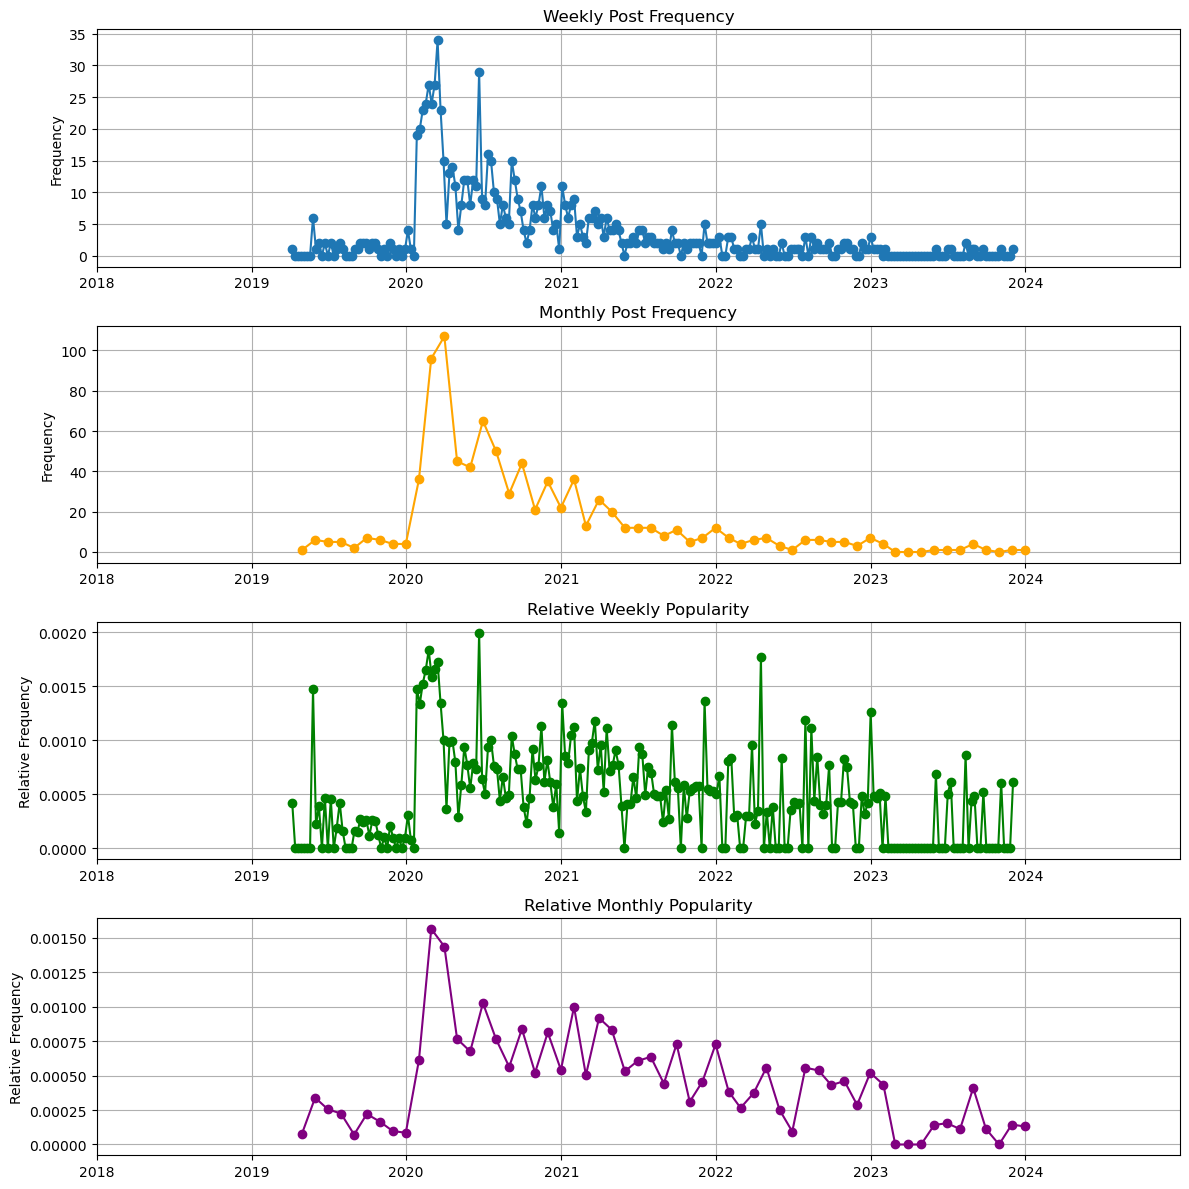

In [25]:
# Acluster_252
cluster_df = popularity_df[popularity_df["cluster"] == "Acluster_252"]
cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
weekly_frequency = cluster_df.resample('W').size()
monthly_frequency = cluster_df.resample('M').size()

# Step 2: Relative Popularity for the cluster
cluster_weekly_relative = weekly_frequency / total_weekly_posts.reindex(weekly_frequency.index)
cluster_monthly_relative = monthly_frequency / total_monthly_posts.reindex(monthly_frequency.index)

# Step 3: Plot trends
plt.figure(figsize=(12, 12))  # Increase figure height to accommodate 3 subplots
x_min = datetime(2018, 1, 1)
x_max = datetime(2024, 12, 31)

# Weekly trend
plt.subplot(4, 1, 1)
plt.plot(weekly_frequency.index, weekly_frequency, marker='o')
plt.title("Weekly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Monthly trend
plt.subplot(4, 1, 2)
plt.plot(monthly_frequency.index, monthly_frequency, marker='o', color='orange')
plt.title("Monthly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Relative popularity
plt.subplot(4, 1, 3)
plt.plot(cluster_weekly_relative.index, cluster_weekly_relative, marker='o', color='green')
plt.title("Relative Weekly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(cluster_monthly_relative.index, cluster_monthly_relative, marker='o', color='purple')
plt.title("Relative Monthly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/scratch/local/jobs/26483905/ipykernel_1705954/3400694598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")


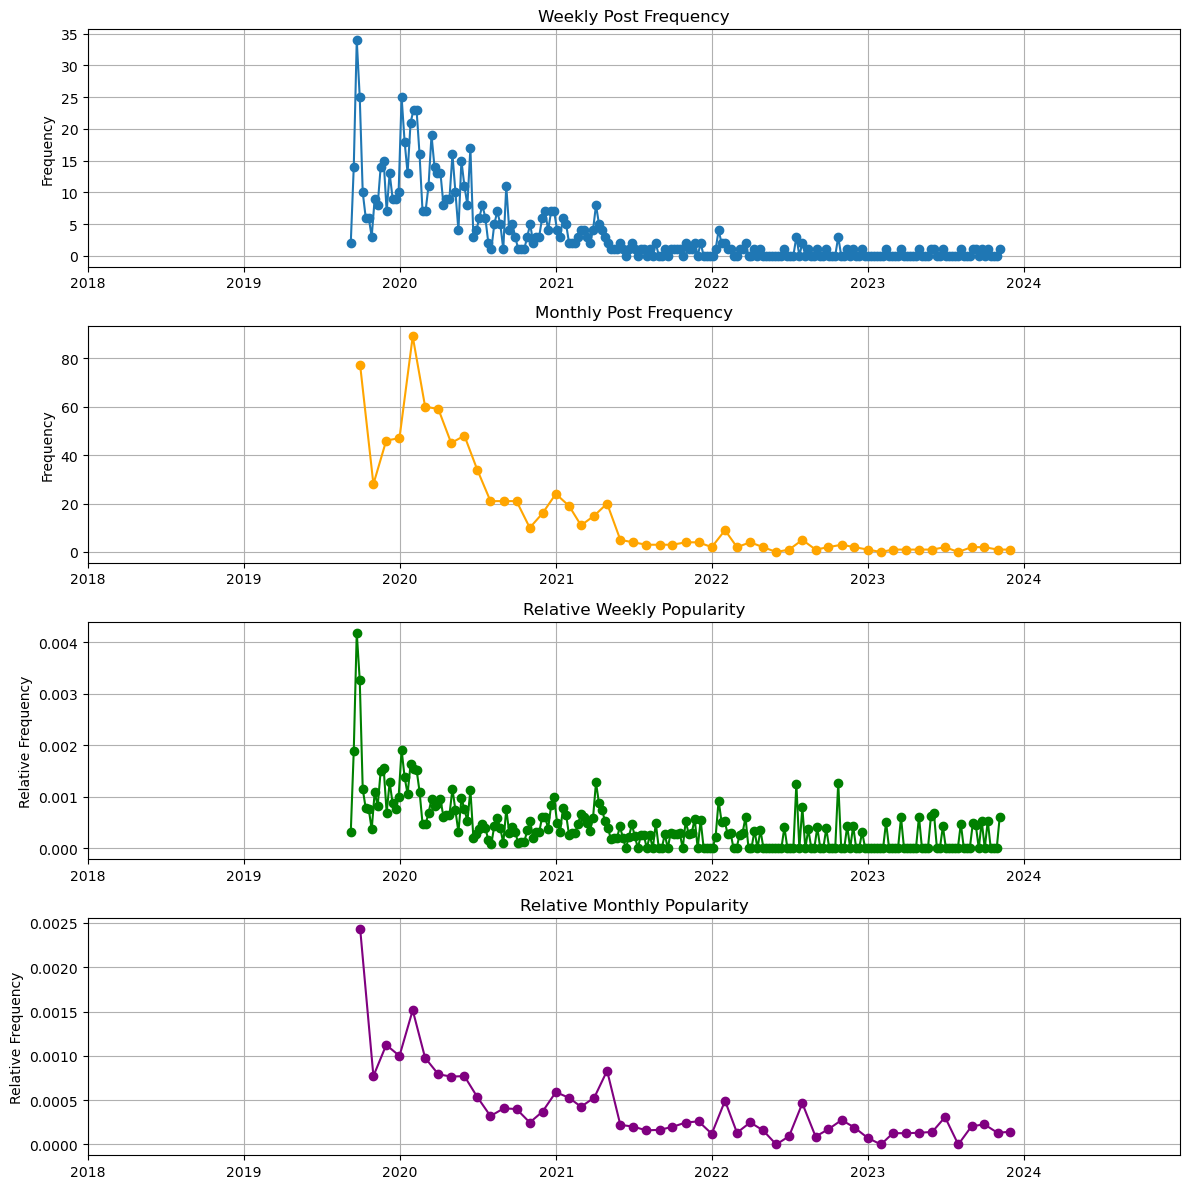

In [26]:
# cluster_1341
cluster_df = popularity_df[popularity_df["cluster"] == "cluster_1341"]
cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
weekly_frequency = cluster_df.resample('W').size()
monthly_frequency = cluster_df.resample('M').size()

# Step 2: Relative Popularity for the cluster
cluster_weekly_relative = weekly_frequency / total_weekly_posts.reindex(weekly_frequency.index)
cluster_monthly_relative = monthly_frequency / total_monthly_posts.reindex(monthly_frequency.index)

# Step 3: Plot trends
plt.figure(figsize=(12, 12))  # Increase figure height to accommodate 3 subplots
x_min = datetime(2018, 1, 1)
x_max = datetime(2024, 12, 31)

# Weekly trend
plt.subplot(4, 1, 1)
plt.plot(weekly_frequency.index, weekly_frequency, marker='o')
plt.title("Weekly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Monthly trend
plt.subplot(4, 1, 2)
plt.plot(monthly_frequency.index, monthly_frequency, marker='o', color='orange')
plt.title("Monthly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Relative popularity
plt.subplot(4, 1, 3)
plt.plot(cluster_weekly_relative.index, cluster_weekly_relative, marker='o', color='green')
plt.title("Relative Weekly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(cluster_monthly_relative.index, cluster_monthly_relative, marker='o', color='purple')
plt.title("Relative Monthly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/scratch/local/jobs/26483905/ipykernel_1705954/1950603790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")


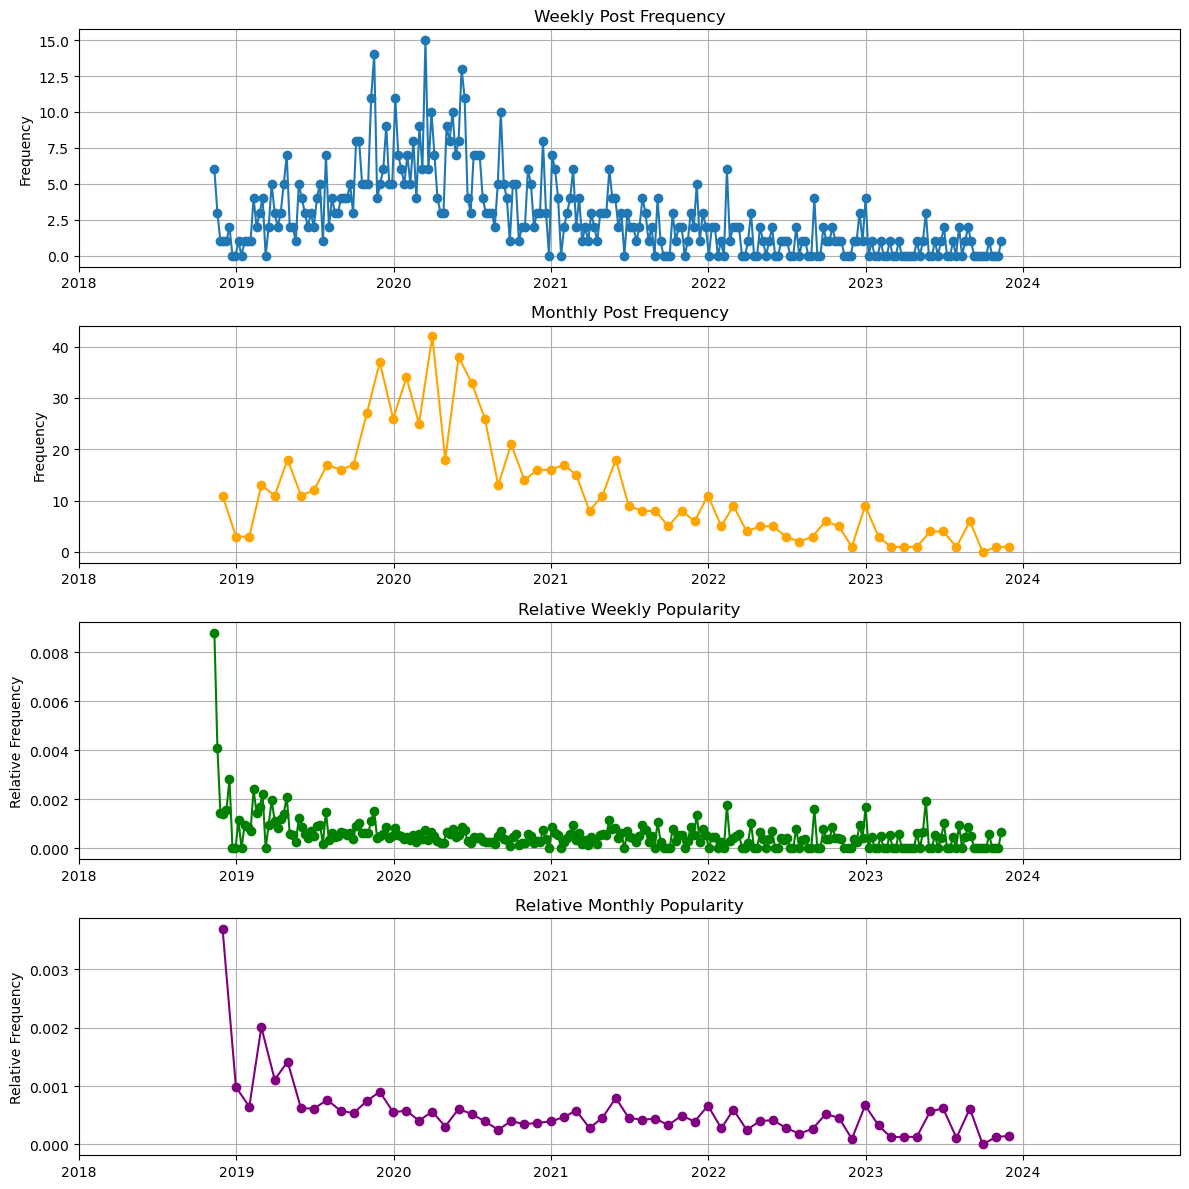

In [27]:
# cluster_31
cluster_df = popularity_df[popularity_df["cluster"] == "cluster_31"]
cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
weekly_frequency = cluster_df.resample('W').size()
monthly_frequency = cluster_df.resample('M').size()

# Step 2: Relative Popularity for the cluster
cluster_weekly_relative = weekly_frequency / total_weekly_posts.reindex(weekly_frequency.index)
cluster_monthly_relative = monthly_frequency / total_monthly_posts.reindex(monthly_frequency.index)

# Step 3: Plot trends
plt.figure(figsize=(12, 12))  # Increase figure height to accommodate 3 subplots
x_min = datetime(2018, 1, 1)
x_max = datetime(2024, 12, 31)

# Weekly trend
plt.subplot(4, 1, 1)
plt.plot(weekly_frequency.index, weekly_frequency, marker='o')
plt.title("Weekly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Monthly trend
plt.subplot(4, 1, 2)
plt.plot(monthly_frequency.index, monthly_frequency, marker='o', color='orange')
plt.title("Monthly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Relative popularity
plt.subplot(4, 1, 3)
plt.plot(cluster_weekly_relative.index, cluster_weekly_relative, marker='o', color='green')
plt.title("Relative Weekly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(cluster_monthly_relative.index, cluster_monthly_relative, marker='o', color='purple')
plt.title("Relative Monthly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/scratch/local/jobs/26483905/ipykernel_1705954/31962320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")


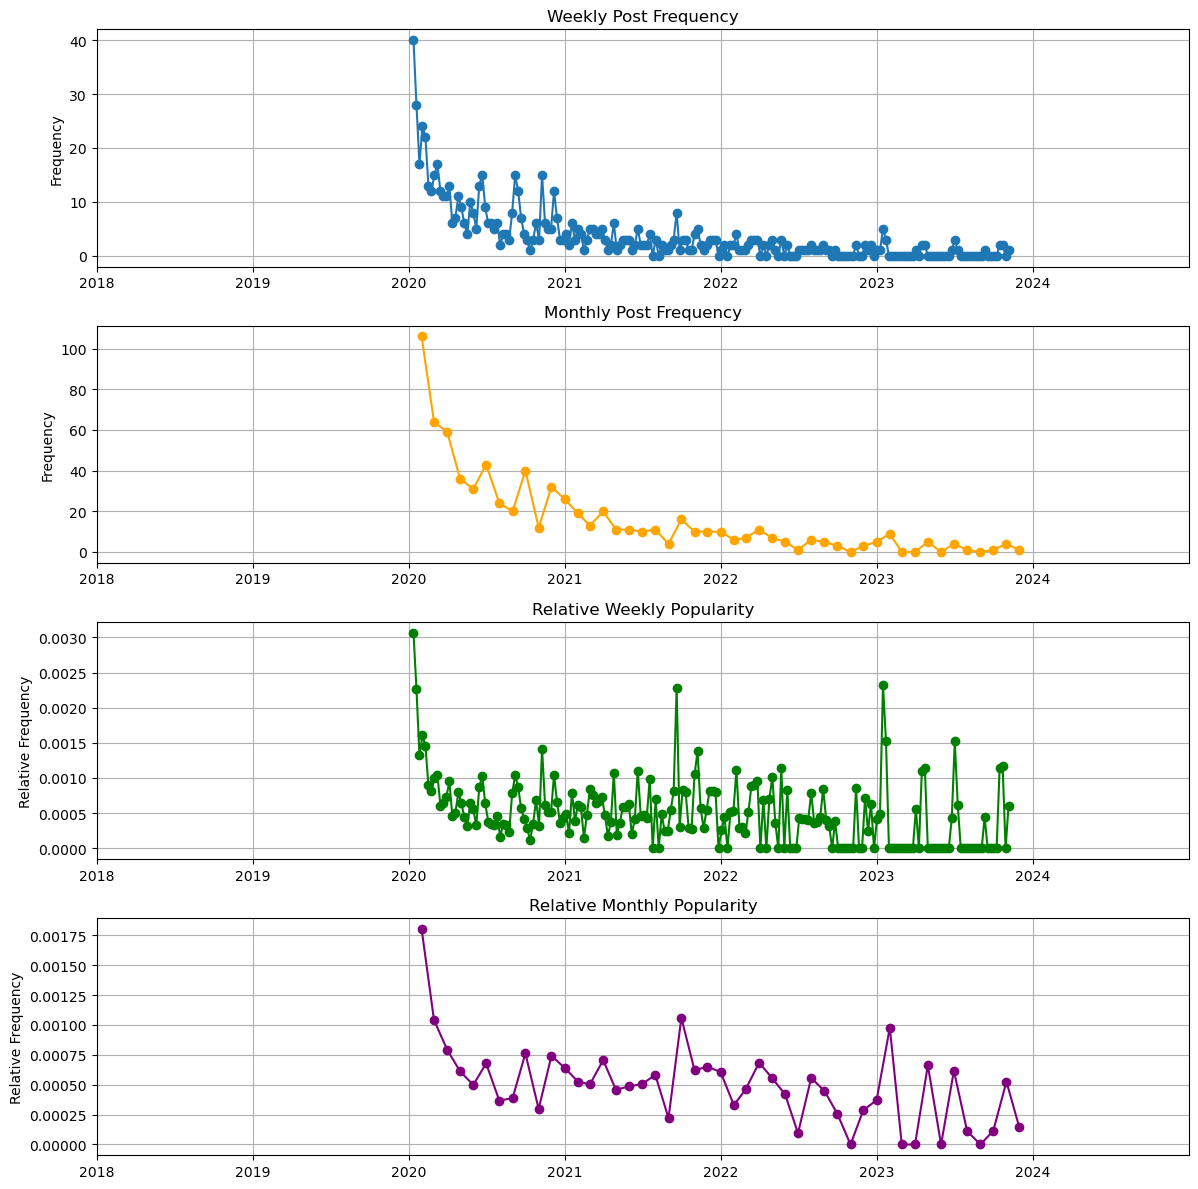

In [28]:
# cluster_8016
cluster_df = popularity_df[popularity_df["cluster"] == "cluster_8016"]
cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
weekly_frequency = cluster_df.resample('W').size()
monthly_frequency = cluster_df.resample('M').size()

# Step 2: Relative Popularity for the cluster
cluster_weekly_relative = weekly_frequency / total_weekly_posts.reindex(weekly_frequency.index)
cluster_monthly_relative = monthly_frequency / total_monthly_posts.reindex(monthly_frequency.index)

# Step 3: Plot trends
plt.figure(figsize=(12, 12))  # Increase figure height to accommodate 3 subplots
x_min = datetime(2018, 1, 1)
x_max = datetime(2024, 12, 31)

# Weekly trend
plt.subplot(4, 1, 1)
plt.plot(weekly_frequency.index, weekly_frequency, marker='o')
plt.title("Weekly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Monthly trend
plt.subplot(4, 1, 2)
plt.plot(monthly_frequency.index, monthly_frequency, marker='o', color='orange')
plt.title("Monthly Post Frequency")
plt.ylabel("Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Relative popularity
plt.subplot(4, 1, 3)
plt.plot(cluster_weekly_relative.index, cluster_weekly_relative, marker='o', color='green')
plt.title("Relative Weekly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(cluster_monthly_relative.index, cluster_monthly_relative, marker='o', color='purple')
plt.title("Relative Monthly Popularity")
plt.ylabel("Relative Frequency")
plt.xlim(x_min, x_max)
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()